<a href="https://colab.research.google.com/github/Saptarshi2001/Weather-prediction-model/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
from google.colab import files
from itertools import combinations
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving indianweather.csv to indianweather.csv


Frequent itemsets:
Itemset: frozenset({'58', '16', '85.1', '1.9', 'Chhattisgarh', 'Sunny', '1007', '250.3'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'69.8', '74', '260.4', '1007', '1', 'Light rain shower', '98', 'Mizoram'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'Jammu and Kashmir', 'Clear', '7', '787.7', '1005', '77.7', '70', '16.1'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'Jammu and Kashmir', 'Sunny', '62', '1011', '894.6', '13', '59.5', '17.7'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'Jammu and Kashmir', 'Sunny', '58.8', '49', '26.1', '1148.2', '1012', '5'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'Jammu and Kashmir', 'Sunny', '82.2', '1006', '20.4', '1268.4', '61', '10'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'66', '84.2', 'Mist', '303.8', '13', '75', 'Jharkhand', '1011'}), Support of this itemset in the dataset: 3
Itemset: frozenset({'4.8',

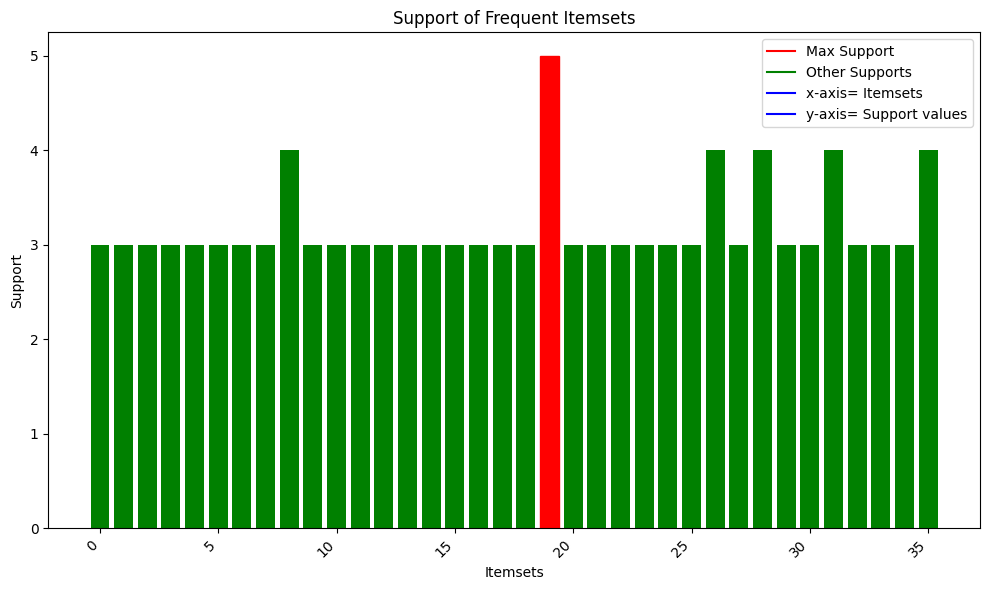

Association Rules:
Rule: frozenset({'85.1'}) => frozenset({'58', '16', '1.9', 'Chhattisgarh', 'Sunny', '1007', '250.3'}), Confidence: 0.3, Lift: 0.1, Conviction: -2.857142857142857,Interestingness:0.00014785597899742543
Rule: frozenset({'69.8'}) => frozenset({'74', '260.4', '1007', '1', 'Light rain shower', '98', 'Mizoram'}), Confidence: 0.3, Lift: 0.1, Conviction: -2.857142857142857,Interestingness:0.00014785597899742543
Rule: frozenset({'16.1'}) => frozenset({'Jammu and Kashmir', 'Clear', '7', '787.7', '1005', '77.7', '70'}), Confidence: 0.3, Lift: 0.1, Conviction: -2.857142857142857,Interestingness:0.00014785597899742543
Rule: frozenset({'59.5'}) => frozenset({'Jammu and Kashmir', 'Sunny', '62', '1011', '894.6', '13', '17.7'}), Confidence: 0.42857142857142855, Lift: 0.14285714285714285, Conviction: -3.5,Interestingness:0.00021122282713917915
Rule: frozenset({'17.7'}) => frozenset({'Jammu and Kashmir', 'Sunny', '62', '1011', '894.6', '13', '59.5'}), Confidence: 0.75, Lift: 0.25, Conv

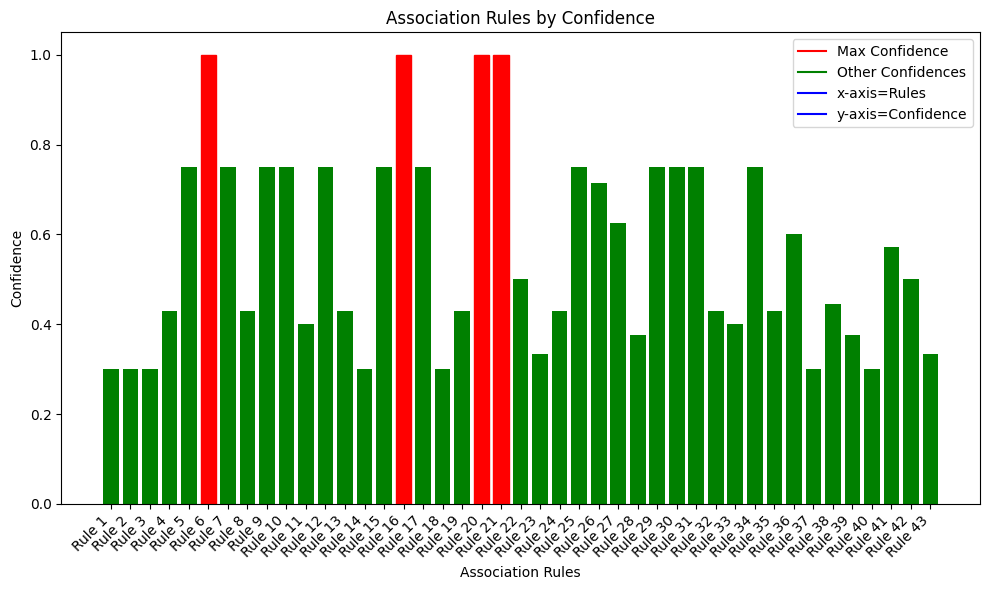

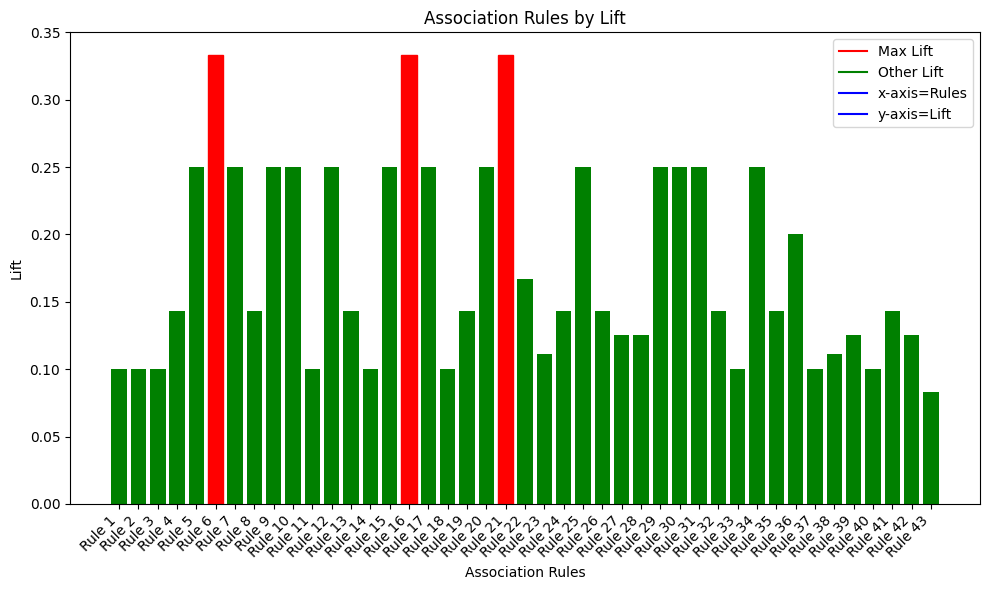

In [2]:
def  generate_candidates(itemsets, k):
    candidates = set()
    for itemset1 in itemsets:
        for itemset2 in itemsets:
            union_set = set(itemset1).union(itemset2)

            if len(union_set) == k:
                candidates.add(frozenset(union_set))
    return candidates

def prune(itemsets, candidates, min_support):
    pruned_itemsets = set()
    for candidate in candidates:
        support_count = sum(1 for itemset in itemsets if candidate.issubset(itemset))
        if support_count >= min_support:
            pruned_itemsets.add(candidate)
    return pruned_itemsets

def calculate_interestingness_formula(support_xy, support_x, support_y, total_transactions):

  return (support_xy / support_x) * (support_xy / support_y) * (1 - support_xy / total_transactions)


def calculate_conviction(confidence, support_antecedent, support_consequent):
  if confidence < 1:
    return (1 - support_consequent) / (1 - confidence)
  else:
    return float('inf')

def generate_rules(frequent_itemsets, min_confidence,min_count,total_transactions):
    rules = []
    for itemset in frequent_itemsets.keys():
        if len(itemset) >=min_count:
            for item in itemset:
                antecedent = frozenset([item])
                consequent = itemset - antecedent
                lift = frequent_itemsets[itemset] / (frequent_itemsets[antecedent] * frequent_itemsets[consequent])
                confidence = frequent_itemsets[itemset] / frequent_itemsets[antecedent]
                support_antecedent = frequent_itemsets[antecedent] / total_transactions
                support_consequent = frequent_itemsets[consequent]
                conviction = calculate_conviction(confidence, frequent_itemsets[antecedent], support_consequent)
                support_both = frequent_itemsets[itemset] / total_transactions
                interestingness = calculate_interestingness_formula(support_both, support_antecedent, support_consequent, total_transactions)
                if confidence >= min_confidence:
                  rules.append((antecedent, consequent, confidence, lift,conviction,interestingness))
    return rules

def print_association_rules(rules):
    print("Association Rules:")
    for rule in rules:
        antecedent, consequent, confidence, lift, conviction,interestingness = rule
        print(f"Rule: {antecedent} => {consequent}, Confidence: {confidence}, Lift: {lift}, Conviction: {conviction},Interestingness:{interestingness}")


def apriori(dataset, min_support, min_confidence):
    total_transactions = len(dataset)
    itemsets = [frozenset([item]) for transaction in dataset for item in transaction]
    frequent_itemsets = {}
    k =  1

    while itemsets:
        candidates = generate_candidates(itemsets, k)
        pruned_candidates = prune(dataset, candidates, min_support)
        frequent_itemsets.update({candidate: sum(1 for itemset in dataset if candidate.issubset(itemset)) for candidate in pruned_candidates})
        itemsets = pruned_candidates
        k +=  1

    association_rules = generate_rules(frequent_itemsets, min_confidence,min_count,total_transactions)
    return frequent_itemsets, association_rules

def plot_bar_graph(rules, metric_name):

    x_labels = [f"Rule {i+1}" for i in range(len(rules))]
    y_values = [rule[2] for rule in rules]  # Confidence values
    max_confidence = max(y_values)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(y_values)), y_values, color='green')
    for i, confidence in enumerate(y_values):
        if confidence == max_confidence:
            bars[i].set_color('red')
    plt.xlabel('Association Rules')
    plt.ylabel(metric_name)
    plt.title(f'Association Rules by Confidence')
    plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')
    plt.plot(max(x_labels), max_confidence, color='red', label='Max Confidence')
    plt.plot(max(x_labels), max_confidence, color='green', label='Other Confidences')
    plt.plot(max(x_labels), max_confidence, color='blue', label='x-axis=Rules')
    plt.plot(max(x_labels), max_confidence, color='blue', label='y-axis=Confidence')

    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_lift_graph(rules, metric_name):

    x_labels = [f"Rule {i+1}" for i in range(len(rules))]
    z_values = [rule[3] for rule in rules]  # lift values
    max_lift = max(z_values)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(z_values)), z_values, color='green')
    for i, confidence in enumerate(z_values):
        if confidence == max_lift:
            bars[i].set_color('red')
    plt.xlabel('Association Rules')
    plt.ylabel(metric_name)
    plt.title(f'Association Rules by Lift')
    plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')
    plt.plot(max(x_labels), max_lift, color='red', label='Max Lift')
    plt.plot(max(x_labels), max_lift, color='green', label='Other Lift')
    plt.plot(max(x_labels), max_lift, color='blue', label='x-axis=Rules')
    plt.plot(max(x_labels), max_lift, color='blue', label='y-axis=Lift')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_frequent_itemsets(frequent_itemsets,min_count):
    print("Frequent itemsets:")
    grouped_itemsets = {}
    supports = []
    for itemset, support_count in frequent_itemsets.items():
        length = len(itemset)
        if length not in grouped_itemsets:
            grouped_itemsets[length] = []
        grouped_itemsets[length].append((itemset, support_count))

    for length, itemsets in grouped_itemsets.items():
        #print(f"{length}-item itemsets:")
        for itemset, support_count in itemsets:
          if len(itemset) >= min_count:
            supports.append(support_count)
            print(f"Itemset: {itemset}, Support of this itemset in the dataset: {support_count}")
    max_support = max(supports)
    plt.figure(figsize=(10, 6))
    #plt.bar(range(len(supports)), supports, color='skyblue')
    bars = plt.bar(range(len(supports)), supports, color='green')
    max_support_index = supports.index(max_support)
    max_support_x = max_support_index
    max_support_y = max_support
    for i, support in enumerate(supports):
        if support == max_support:
            bars[i].set_color('red')

    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.title('Support of Frequent Itemsets')
    plt.xticks(rotation=45, ha='right')
    plt.plot(max_support_x, max_support_y, color='red', label='Max Support')
    plt.plot(max_support_x, max_support_y, color='green', label='Other Supports')
    plt.plot(max_support_x, max_support_y, color='blue', label='x-axis= Itemsets')
    plt.plot(max_support_x, max_support_y, color='blue', label='y-axis= Support values')
    plt.legend()
    plt.tight_layout()
    plt.show()



def read_dataset_from_csv(file_path, delimiter=','): # before you proceed make sure that you change the numbers in the line 'for col_index in [ 2,9,10,15,19,20,28,30 ]' accordingly
# to the column numbers of your dataset that you are using for the calculation.Also make sure that the min_count is the same as the  number of column numbers that you are using .
    dataset = []
    with open(file_path, 'r') as csvfile:
      reader = csv.reader(csvfile, delimiter=delimiter)
      for row in reader:
        transaction = []

        #for col_index in [ 2, 3, 4, 6,12]:
        for col_index in [ 2,9,10,15,19,20,28,30 ]:
          if row[col_index]:
            transaction.append(row[col_index])
        dataset.append(transaction)
    return dataset

# Example usage:
file_path = 'indianweather.csv'
dataset = read_dataset_from_csv(file_path)

min_count=8 # Give the minimum count according to the number of columns you have chosen for getting the support,confidence,lift etc in read_dataset_from_csv
min_support = 3
min_confidence = 0.3

frequent_itemsets, association_rules = apriori(dataset, min_support, min_confidence)


print_frequent_itemsets(frequent_itemsets,min_count)

print_association_rules(association_rules)
plot_bar_graph(association_rules, 'Confidence')
plot_lift_graph(association_rules,'Lift')
